### Preprocessing the US data sets

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import sys
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from shapely.geometry import Point, LineString

In [3]:
# read files
us_tract = pd.read_pickle('../../data/raw_data/usa_tract.pickle')
us_tract_shp = gpd.read_file('../../data/raw_data/shapefiles/us_census_tract.shp')

In [4]:
# read files
flow_20_march_week4 = pd.read_csv('../../data/raw_data/2020_march_week4_flow_ct.csv')
flow_16_acs_shp = gpd.read_file('../../data/raw_data/acs_2016_flows/us_ttw_v3_US_only_epsg5070v2/us_ttw_v3_US_only_epsg5070v2.shp')

In [5]:
# read files
bts_travel = pd.read_csv('../../data/raw_data/BTS_travel_2017/latch_2017-b.csv')
cdc_health = gpd.read_file('../../data/raw_data/CDC_places_2020/geo_export_2e64cb5f-cf4a-46a3-95b5-07905dafa772.shp')

In [6]:
# descriptive
print(flow_20_march_week4.shape)
print(flow_16_acs_shp.shape)
print(us_tract.shape)
print(us_tract_shp.shape)
print(bts_travel.shape)
print(cdc_health.shape)
# print(state_fips.shape)

(4986074, 9)
(4155548, 13)
(72359, 26)
(74133, 15)
(73056, 128)
(72337, 66)


In [7]:
print(sys.getsizeof(flow_20_march_week4)/1000000)
print(sys.getsizeof(flow_16_acs_shp)/1000000)
print(sys.getsizeof(us_tract)/1000000)
print(sys.getsizeof(us_tract_shp)/1000000)
print(sys.getsizeof(bts_travel)/1000000)
print(sys.getsizeof(cdc_health)/1000000)

698.05052
930.842912
30.825094
62.976266
74.809504
198.874683


In [8]:
# state number list
state_df = pd.read_csv('../../data/raw_data/state_fips.csv')
state_dir = {}
for key,item in zip(state_df['Postal Code'], state_df['FIPS']):
    # first, control the digits
    item = str(item)
    if len(str(item)) == 1:
        item = '0'+str(item)
    # 
    if str(item) not in ['60','66','69','72','78','02','15']:
        state_dir[item] = key # ahhh...the order sucks

# mainland US ID
state_dir

# state_dic = []

# fips_str = []
# for i in state_fips.FIPS:
#     if len(str(i)) == 1:
#         fips_str.append('0'+str(i))
#     else:
#         fips_str.append(str(i))

# state_fips.FIPS = fips_str
# state_fips

{'01': 'AL',
 '04': 'AZ',
 '05': 'AR',
 '06': 'CA',
 '08': 'CO',
 '09': 'CT',
 '10': 'DE',
 '12': 'FL',
 '13': 'GA',
 '16': 'ID',
 '17': 'IL',
 '18': 'IN',
 '19': 'IA',
 '20': 'KS',
 '21': 'KY',
 '22': 'LA',
 '23': 'ME',
 '24': 'MD',
 '25': 'MA',
 '26': 'MI',
 '27': 'MN',
 '28': 'MS',
 '29': 'MO',
 '30': 'MT',
 '31': 'NE',
 '32': 'NV',
 '33': 'NH',
 '34': 'NJ',
 '35': 'NM',
 '36': 'NY',
 '37': 'NC',
 '38': 'ND',
 '39': 'OH',
 '40': 'OK',
 '41': 'OR',
 '42': 'PA',
 '44': 'RI',
 '45': 'SC',
 '46': 'SD',
 '47': 'TN',
 '48': 'TX',
 '49': 'UT',
 '50': 'VT',
 '51': 'VA',
 '53': 'WA',
 '54': 'WV',
 '55': 'WI',
 '56': 'WY'}

In [9]:
len(state_dir.keys()) # 48 states only - exclusing Alaska and Howai 

48

In [10]:
bts_travel.head() # geocode

,geocode,Cluster,urban_group,flag_acs_lt_moe,flag_manhattan_trt,flag_gpqtr,flag_incomplete_acs,est_pmiles,est_ptrp,est_vmiles,...,vmiles_3mem_0veh,vmiles_3mem_1veh,vmiles_3mem_2veh,vmiles_3mem_3veh,vmiles_3mem_4veh,vmiles_4mem_0veh,vmiles_4mem_1veh,vmiles_4mem_2veh,vmiles_4mem_3veh,vmiles_4mem_4veh
0,9001990000,1,NaN,1,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9007990100,1,NaN,1,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9009990000,1,NaN,1,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9011990100,1,NaN,1,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23005990000,1,NaN,1,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cdc_health.head() # tractfips

,access2_cr,access2__2,arthritis_,arthriti_2,binge_crud,binge_cr_2,bphigh_cru,bphigh_c_2,bpmed_crud,bpmed_cr_2,...,sleep_cr_2,stateabbr,statedesc,stroke_cru,stroke_c_2,teethlost_,teethlos_2,totalpopul,tractfips,geometry
0,"( 9.1, 12.6)",10.7,"( 6.4, 7.4)",6.9,"(27.4, 29.6)",28.5,"(11.2, 12.7)",11.9,"(32.4, 35.4)",33.7,...,32.4,CA,California,"( 0.7, 0.9)",0.8,"( 5.7, 14.2)",9.4,3344,06083002606,POINT (-120.55837 34.71302)
1,"(15.5, 20.7)",18.0,"(17.2, 18.5)",17.9,"(14.1, 15.1)",14.7,"(25.7, 27.4)",26.6,"(68.7, 70.8)",69.8,...,42.6,MA,Massachusetts,"( 2.7, 3.2)",2.9,"(18.8, 31.1)",24.8,3267,25017311200,POINT (-71.32434 42.63797)
2,"( 5.9, 10.3)",7.9,"(28.3, 32.7)",30.6,"(14.4, 15.6)",15.0,"(28.8, 32.7)",30.7,"(76.5, 79.4)",78.0,...,30.3,NH,New Hampshire,"( 2.6, 3.9)",3.2,"( 5.0, 22.3)",10.7,3908,33013032500,POINT (-71.58644 43.19016)
3,"( 7.8, 13.4)",11.0,"( 3.2, 4.0)",3.7,"(35.0, 41.2)",38.0,"( 7.0, 9.1)",8.2,"(15.9, 18.7)",17.3,...,36.9,CT,Connecticut,"( 0.3, 0.5)",0.4,None,NaN,2097,09011980000,POINT (-72.08662 41.39887)
4,"(12.6, 17.0)",14.9,"( 3.8, 4.3)",4.0,"(28.9, 33.3)",30.9,"( 7.3, 8.2)",7.8,"(15.1, 16.5)",15.8,...,31.2,CO,Colorado,"( 0.4, 0.4)",0.4,None,NaN,5474,08041004402,POINT (-104.77359 38.74265)


In [12]:
flow_20_march_week4.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows
0,48215024108,48215023902,-98.39318,26.281112,-98.189715,26.271691,03/23/20 - 03/29/20,7,179.0
1,48215024108,48215020503,-98.39318,26.281112,-98.266601,26.159350,03/23/20 - 03/29/20,12,307.0
2,48215024108,48215021803,-98.39318,26.281112,-98.146706,26.200975,03/23/20 - 03/29/20,4,102.0
3,48215024108,48215021903,-98.39318,26.281112,-98.107774,26.184998,03/23/20 - 03/29/20,14,359.0
4,48215024108,42037051400,-98.39318,26.281112,-76.298024,41.011175,03/23/20 - 03/29/20,4,102.0


In [13]:
flow_16_acs_shp.head()

,Ofips,Dfips,Ostfips,Octfips,Otrfips,Dstfips,Dctfips,Dtrfips,Flow,Moe,LenKM,ESTDIVMOE,geometry
0,06073018700,06073018700,6,73,18700,6,73,18700,20950,2359,0.0,8.88,"LINESTRING (-1962571.816 1365494.964, -1962571..."
1,51710000902,51710000902,51,710,902,51,710,902,10155,2516,0.0,4.04,"LINESTRING (1725102.003 1722267.521, 1725102.0..."
2,45079011501,45079011501,45,79,11501,45,79,11501,8735,875,0.0,9.98,"LINESTRING (1374784.181 1326371.876, 1374784.1..."
3,13215010802,13215010802,13,215,10802,13,215,10802,7720,1144,0.0,6.75,"LINESTRING (1043619.702 1106797.886, 1043619.7..."
4,06071010402,06071010402,6,71,10402,6,71,10402,7040,848,0.0,8.30,"LINESTRING (-1822105.260 1460201.368, -1822105..."


In [14]:
us_tract.head()

,total_pop,total_houses,total_sex,male,female,median_age,total_race,white,black,native,...,pop_inc_15k_25k,pop_inc_25k_35k,pop_inc_35k_50k,pop_inc_50k_65k,pop_inc_65k_75k,pop_inc_75k,state_fips,county_fips,tract_fips,full_tract_fips
0,341.0,126.0,5143,2180,2963,39.0,5143,4036,884,31,...,690,519,547,400,133,211,01,097,006501,01097006501
1,331.0,133.0,11578,5705,5873,37.6,11578,10678,451,0,...,1115,737,1287,863,277,1181,01,097,006502,01097006502
2,266.0,101.0,5574,2788,2786,38.9,5574,5033,419,12,...,785,520,425,418,138,283,01,097,006600,01097006600
3,318.0,128.0,6436,3174,3262,39.8,6436,4799,883,11,...,993,363,340,504,53,315,01,097,006701,01097006701
4,231.0,112.0,3270,1564,1706,39.0,3270,2332,415,0,...,469,414,357,188,0,92,01,097,006702,01097006702


In [15]:
us_tract_shp.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,layer,path,geometry
0,38,047,972500,38047972500,9725,Census Tract 9725,G5020,S,2571326104,47715596,+46.4692780,-099.5045846,tl_2017_38_tract,/Users/zhangxh/tmp/ustract/tl_2017_38_tract/,"POLYGON ((-99.91742 46.34976, -99.91718 46.355..."
1,38,073,969000,38073969000,9690,Census Tract 9690,G5020,S,1442387838,1962257,+46.4517152,-097.7939289,tl_2017_38_tract,/Users/zhangxh/tmp/ustract/tl_2017_38_tract/,"POLYGON ((-98.03491 46.36969, -98.03491 46.369..."
2,38,009,952400,38009952400,9524,Census Tract 9524,G5020,S,2255183406,53013501,+48.8022043,-100.5257167,tl_2017_38_tract,/Users/zhangxh/tmp/ustract/tl_2017_38_tract/,"POLYGON ((-100.97129 48.95309, -100.96864 48.9..."
3,38,009,952500,38009952500,9525,Census Tract 9525,G5020,S,2055808274,21851497,+48.7703061,-101.2015486,tl_2017_38_tract,/Users/zhangxh/tmp/ustract/tl_2017_38_tract/,"POLYGON ((-101.49674 48.99490, -101.49674 48.9..."
4,38,009,952300,38009952300,9523,Census Tract 9523,G5020,S,10204813,0,+48.8208455,-100.4463352,tl_2017_38_tract,/Users/zhangxh/tmp/ustract/tl_2017_38_tract/,"POLYGON ((-100.46792 48.80690, -100.46791 48.8..."


In [16]:
type(cdc_health.tractfips[0])

str

In [17]:
# edit flow_20_march_week4.geoid_o and geoid_d to 11 digits string
geoid_o_11_digits = []
geoid_d_11_digits = []

for geoid_o_ind in flow_20_march_week4.geoid_o:
    if len(str(geoid_o_ind)) == 10:
        geoid_o_11_digits.append('0'+str(geoid_o_ind))
    else:
        geoid_o_11_digits.append(str(geoid_o_ind))

for geoid_d_ind in flow_20_march_week4.geoid_d:
    if len(str(geoid_d_ind)) == 10:
        geoid_d_11_digits.append('0'+str(geoid_d_ind))
    else:
        geoid_d_11_digits.append(str(geoid_d_ind))
                
# replace 
flow_20_march_week4.geoid_o = geoid_o_11_digits
flow_20_march_week4.geoid_d = geoid_d_11_digits

In [18]:
bts_travel_geoid = []

for geoid in bts_travel.geocode:
    if len(str(geoid)) == 10:
        bts_travel_geoid.append('0'+str(geoid))
    else:
        bts_travel_geoid.append(str(geoid))

bts_travel['geoid'] = bts_travel_geoid
cdc_health['geoid'] = cdc_health['tractfips']

In [19]:
# check us_tract_shp.GEOID
test = 0
for id_ in us_tract_shp.GEOID:
    if len(id_) == 11:
        test += 1
print(test)

74133


In [20]:
# check the FIPS of the three files
fips_us_tract = us_tract.full_tract_fips.unique() # note that the us_tract data did not include area outside the mainland. 
fips_us_tract_shp = us_tract_shp.GEOID.unique()
fips_flow_16_o = flow_16_acs_shp.Ofips.unique()
fips_flow_16_d = flow_16_acs_shp.Dfips.unique()
fips_flow_20_o = flow_20_march_week4.geoid_o.unique()
fips_flow_20_d = flow_20_march_week4.geoid_d.unique()


In [21]:
print(len(fips_us_tract))
print(len(fips_us_tract_shp))
print(len(fips_flow_16_o))
print(len(fips_flow_16_d))
print(len(fips_flow_20_o))
print(len(fips_flow_20_d))
print(len(bts_travel['geoid'].unique()))
print(len(cdc_health['geoid'].unique()))


72359
74133
72257
72424
73533
73231
73056
72337


In [22]:
# check if the first two digits of the FIPS are in the mainland
def check_mainland_US(fips_list, us_state_fips):
    not_in_mainland = 0
    for fips in fips_list:
        if fips[:2] not in us_state_fips:
            not_in_mainland += 1
    return not_in_mainland    

In [23]:
# print the # of census tracts outside the mainland USA
print(check_mainland_US(fips_us_tract, list(state_dir.keys())))
print(check_mainland_US(fips_us_tract_shp, list(state_dir.keys())))
print(check_mainland_US(fips_flow_16_o, list(state_dir.keys())))
print(check_mainland_US(fips_flow_16_d, list(state_dir.keys())))
print(check_mainland_US(fips_flow_20_o, list(state_dir.keys())))
print(check_mainland_US(fips_flow_20_d, list(state_dir.keys())))
print(check_mainland_US(bts_travel['geoid'].unique(), list(state_dir.keys())))
print(check_mainland_US(cdc_health['geoid'].unique(), list(state_dir.keys())))

0
1774
656
662
1551
1426
697
661


In [24]:
# use us_tract as a base to create a subsample for the data sets.
# us_tract includes all the tracts in the mainland US.
flow_16_acs_mainland_shp = flow_16_acs_shp.loc[np.logical_and(flow_16_acs_shp.Ofips.isin(us_tract.full_tract_fips.values),flow_16_acs_shp.Dfips.isin(us_tract.full_tract_fips.values)), :]
flow_20_march_week4_mainland = flow_20_march_week4.loc[np.logical_and(flow_20_march_week4.geoid_o.isin(us_tract.full_tract_fips.values),flow_20_march_week4.geoid_d.isin(us_tract.full_tract_fips.values))]


In [25]:
#
us_tract_mainland_shp = us_tract_shp.loc[us_tract_shp.GEOID.isin(us_tract.full_tract_fips.values), :]
bts_travel_mainland = bts_travel.loc[bts_travel.geoid.isin(us_tract.full_tract_fips.values), :]
cdc_health_mainland = cdc_health.loc[cdc_health.geoid.isin(us_tract.full_tract_fips.values), :]

In [26]:
print(flow_16_acs_mainland_shp.shape)
print(flow_20_march_week4_mainland.shape)

(4104517, 13)
(4931996, 9)


In [27]:
print(us_tract_mainland_shp.shape)

(72359, 15)


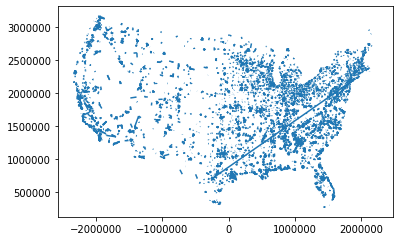

In [56]:
flow_16_acs_mainland_shp.head(50000).plot()
# see weird outlier. Need to clean the outliers. 

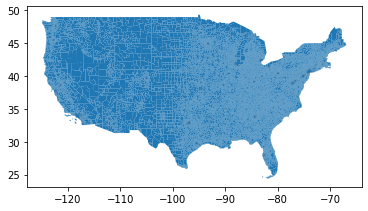

In [20]:
us_tract_mainland_shp.plot() # cool.

In [72]:
# flow_16_acs_mainland_shp.geometry[5000].length

1120.1384202466231

## Clean us_tract dataframe 

In [28]:
us_tract.head()

,total_pop,total_houses,total_sex,male,female,median_age,total_race,white,black,native,...,pop_inc_15k_25k,pop_inc_25k_35k,pop_inc_35k_50k,pop_inc_50k_65k,pop_inc_65k_75k,pop_inc_75k,state_fips,county_fips,tract_fips,full_tract_fips
0,341.0,126.0,5143,2180,2963,39.0,5143,4036,884,31,...,690,519,547,400,133,211,01,097,006501,01097006501
1,331.0,133.0,11578,5705,5873,37.6,11578,10678,451,0,...,1115,737,1287,863,277,1181,01,097,006502,01097006502
2,266.0,101.0,5574,2788,2786,38.9,5574,5033,419,12,...,785,520,425,418,138,283,01,097,006600,01097006600
3,318.0,128.0,6436,3174,3262,39.8,6436,4799,883,11,...,993,363,340,504,53,315,01,097,006701,01097006701
4,231.0,112.0,3270,1564,1706,39.0,3270,2332,415,0,...,469,414,357,188,0,92,01,097,006702,01097006702


In [29]:
us_tract.columns

Index(['total_pop', 'total_houses', 'total_sex', 'male', 'female',
       'median_age', 'total_race', 'white', 'black', 'native', 'asian',
       'total_pop_inc', 'pop_no_inc', 'pop_with_inc', 'pop_inc_10k',
       'pop_inc_1k_15k', 'pop_inc_15k_25k', 'pop_inc_25k_35k',
       'pop_inc_35k_50k', 'pop_inc_50k_65k', 'pop_inc_65k_75k', 'pop_inc_75k',
       'state_fips', 'county_fips', 'tract_fips', 'full_tract_fips'],
      dtype='object')

In [30]:
### create variables from the census data
pop = us_tract.total_pop
households = us_tract.total_houses
#
male = us_tract.male
male_ratio = us_tract.male/us_tract.total_sex
female = us_tract.female
female_ratio = us_tract.female/us_tract.total_sex
#
median_age = us_tract.median_age
#
white = us_tract.white
black = us_tract.black
asian = us_tract.asian
other_race = us_tract.total_race - us_tract.white - us_tract.black - us_tract.asian
white_ratio = us_tract.white/us_tract.total_race
black_ratio = us_tract.black/us_tract.total_race
asian_ratio = us_tract.asian/us_tract.total_race
other_race_ratio = other_race/us_tract.total_race
# 
income = (us_tract.pop_no_inc * 0 + us_tract.pop_inc_10k * 10000 + us_tract.pop_inc_1k_15k * 12500 + \
         us_tract.pop_inc_15k_25k * 20000 + us_tract.pop_inc_25k_35k * 30000 + us_tract.pop_inc_35k_50k * 42500 + \
         us_tract.pop_inc_50k_65k * 57500 + us_tract.pop_inc_65k_75k * 70000 + us_tract.pop_inc_75k * 75000)/us_tract.total_pop_inc
geoid = us_tract.full_tract_fips

In [31]:
us_tract_df = pd.DataFrame({'geoid':geoid,
                                'pop':pop,
                                'households':households,
                                'male':male,
                                'male_ratio':male_ratio,
                                'female':female,
                                'female_ratio':female_ratio,
                                'median_age':median_age,
                                'white':white,
                                'black':black,
                                'asian':asian,
                                'other_race':other_race,
                                'white_ratio':white_ratio,
                                'black_ratio':black_ratio,
                                'asian_ratio':asian_ratio,
                                'other_race_ratio':other_race_ratio,                            
                                'income':income,
                                'pop_no_inc':us_tract.pop_no_inc,
                                'pop_inc_10k':us_tract.pop_inc_10k,
                                'pop_inc_10k_15k':us_tract.pop_inc_1k_15k,
                                'pop_inc_15k_25k':us_tract.pop_inc_15k_25k,
                                'pop_inc_25k_35k':us_tract.pop_inc_25k_35k,
                                'pop_inc_35k_50k':us_tract.pop_inc_35k_50k,
                                'pop_inc_50k_65k':us_tract.pop_inc_50k_65k,
                                'pop_inc_65k_75k':us_tract.pop_inc_65k_75k,
                                'pop_inc_75k':us_tract.pop_inc_75k})


In [32]:
us_tract_df.head()

,geoid,pop,households,male,male_ratio,female,female_ratio,median_age,white,black,...,income,pop_no_inc,pop_inc_10k,pop_inc_10k_15k,pop_inc_15k_25k,pop_inc_25k_35k,pop_inc_35k_50k,pop_inc_50k_65k,pop_inc_65k_75k,pop_inc_75k
0,01097006501,341.0,126.0,2180,0.423877,2963,0.576123,39.0,4036,884,...,27168.312064,521,829,303,690,519,547,400,133,211
1,01097006502,331.0,133.0,5705,0.492745,5873,0.507255,37.6,10678,451,...,29983.934883,1740,1379,758,1115,737,1287,863,277,1181
2,01097006600,266.0,101.0,2788,0.500179,2786,0.499821,38.9,5033,419,...,26378.593890,675,778,430,785,520,425,418,138,283
3,01097006701,318.0,128.0,3174,0.493163,3262,0.506837,39.8,4799,883,...,23937.650120,763,1094,571,993,363,340,504,53,315
4,01097006702,231.0,112.0,1564,0.478287,1706,0.521713,39.0,2332,415,...,23142.322097,503,392,255,469,414,357,188,0,92


In [33]:
us_tract_mainland_shp = us_tract_mainland_shp.merge(us_tract_df, left_on = 'GEOID', right_on = 'geoid', how = 'inner')

In [34]:
us_tract_mainland_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,income,pop_no_inc,pop_inc_10k,pop_inc_10k_15k,pop_inc_15k_25k,pop_inc_25k_35k,pop_inc_35k_50k,pop_inc_50k_65k,pop_inc_65k_75k,pop_inc_75k
0,38,047,972500,38047972500,9725,Census Tract 9725,G5020,S,2571326104,47715596,...,31163.924436,93,321,154,257,219,244,130,55,168
1,38,073,969000,38073969000,9690,Census Tract 9690,G5020,S,1442387838,1962257,...,32868.525896,117,211,68,157,183,204,136,51,128
2,38,009,952400,38009952400,9524,Census Tract 9524,G5020,S,2255183406,53013501,...,35910.290237,135,276,162,254,215,233,247,69,304
3,38,009,952500,38009952500,9525,Census Tract 9525,G5020,S,2055808274,21851497,...,33663.624511,161,249,134,200,132,218,128,102,210
4,38,009,952300,38009952300,9523,Census Tract 9523,G5020,S,10204813,0,...,29040.669856,169,424,164,381,301,271,111,64,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72354,24,033,803001,24033803001,8030.01,Census Tract 8030.01,G5020,S,1233981,0,...,31140.954018,256,382,130,269,419,362,228,100,181
72355,24,033,803002,24033803002,8030.02,Census Tract 8030.02,G5020,S,899654,0,...,30981.675393,405,493,63,215,369,275,289,103,271
72356,24,033,803200,24033803200,8032,Census Tract 8032,G5020,S,1549050,2326,...,27073.333333,283,378,109,483,367,288,131,99,112
72357,24,033,803401,24033803401,8034.01,Census Tract 8034.01,G5020,S,526459,1539,...,26149.453823,199,158,70,137,145,115,96,29,58


In [35]:
# also augment the bts and cdc data to us_tract_mainland_shp
# need to pick columns
# bts_travel_mainland

bts_travel_dic = {'geoid':bts_travel_mainland.geoid,
                 'est_pmiles':bts_travel_mainland.est_pmiles,
                 'est_ptrp':bts_travel_mainland.est_ptrp,
                 'est_vmiles':bts_travel_mainland.est_vmiles,
                 'est_vtrp':bts_travel_mainland.est_vtrp,
                 'total_pop_bts':bts_travel_mainland.tot_pop,
                 'households_bts':bts_travel_mainland.hh_cnt,
                 'median_hh_inc_bts':bts_travel_mainland.median_hh_inc,
                 'hh_veh_0':bts_travel_mainland.hh_veh_0,
                 'hh_veh_1':bts_travel_mainland.hh_veh_1,
                 'hh_veh_2_more':bts_travel_mainland.hh_veh_2_more,
                 'pct_veh_0':bts_travel_mainland.pct_veh_0,
                 'pct_veh_1':bts_travel_mainland.pct_veh_1,
                 'pct_veh_2_more':bts_travel_mainland.pct_veh_2_more,
                 'hh_worker_1':bts_travel_mainland.hh_worker_1,
                 'pct_worker_1':bts_travel_mainland.pct_worker_1,
                 'hh_worker_2_more':bts_travel_mainland.hh_worker_2_more,
                 'pct_worker_2_more':bts_travel_mainland.pct_worker_2_more}

bts_travel_df = pd.DataFrame(bts_travel_dic)
bts_travel_df
# print(us_tract_mainland_shp.shape)
# print(bts_travel_mainland.shape)
# print(cdc_health_mainland.shape)

,geoid,est_pmiles,est_ptrp,est_vmiles,est_vtrp,total_pop_bts,households_bts,median_hh_inc_bts,hh_veh_0,hh_veh_1,hh_veh_2_more,pct_veh_0,pct_veh_1,pct_veh_2_more,hh_worker_1,pct_worker_1,hh_worker_2_more,pct_worker_2_more
0,09001990000,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,0,NaN,0,NaN
1,09007990100,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,0,NaN,0,NaN
2,09009990000,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,0,NaN,0,NaN
3,09011990100,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,0,NaN,0,NaN
4,23005990000,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73051,53077003001,71.47,8.64,50.67,5.80,4153,1648,60915.0,7,204,1437,0.004248,12.38,87.20,526,31.92,568,34.47
73052,53077003100,72.72,9.11,51.37,5.89,5563,1905,65634.0,52,419,1434,0.027297,21.99,75.28,585,30.71,811,42.57
73053,53077940001,74.62,9.61,51.10,6.02,6460,1783,48401.0,39,368,1376,0.021873,20.64,77.17,606,33.99,640,35.89
73054,53077940002,72.34,9.20,49.71,5.80,4468,1219,46756.0,42,223,954,0.034454,18.29,78.26,430,35.27,392,32.16


In [36]:
cdc_health_mainland[['geoid','totalpopul','binge_cr_2','bphigh_c_2','chd_crudep','diabetes_2','obesity__2',
                    'lpa_crudep']]

,geoid,totalpopul,binge_cr_2,bphigh_c_2,chd_crudep,diabetes_2,obesity__2,lpa_crudep
0,06083002606,3344,28.5,11.9,1.3,2.5,22.0,12.6
1,25017311200,3267,14.7,26.6,5.7,12.0,23.0,36.0
2,33013032500,3908,15.0,30.7,6.8,9.6,25.4,19.7
3,09011980000,2097,38.0,8.2,0.8,1.2,19.7,11.6
4,08041004402,5474,30.9,7.8,0.7,1.1,15.6,9.3
...,...,...,...,...,...,...,...,...
72332,48439100602,3759,16.9,29.4,4.6,10.2,35.6,27.1
72333,55101000901,3783,23.7,29.9,6.1,9.8,40.5,26.1
72334,55087012504,3031,29.4,24.4,4.1,6.5,29.6,14.9
72335,51011040200,4202,15.8,36.8,7.0,11.7,33.4,25.0


In [37]:
cdc_health_mainland.columns

Index(['access2_cr', 'access2__2', 'arthritis_', 'arthriti_2', 'binge_crud',
       'binge_cr_2', 'bphigh_cru', 'bphigh_c_2', 'bpmed_crud', 'bpmed_cr_2',
       'cancer_cru', 'cancer_c_2', 'casthma_cr', 'casthma__2', 'cervical_c',
       'cervical_2', 'chd_crude9', 'chd_crudep', 'checkup_cr', 'checkup__2',
       'cholscreen', 'cholscre_2', 'colon_scre', 'colon_sc_2', 'copd_crude',
       'copd_cru_2', 'corem_crud', 'corem_cr_2', 'corew_crud', 'corew_cr_2',
       'countyfips', 'countyname', 'csmoking_c', 'csmoking_2', 'dental_cru',
       'dental_c_2', 'diabetes_c', 'diabetes_2', 'geographic', 'highchol_c',
       'highchol_2', 'kidney_cru', 'kidney_c_2', 'latitude', 'longitude',
       'lpa_crude9', 'lpa_crudep', 'mammouse_c', 'mammouse_2', 'mhlth_crud',
       'mhlth_cr_2', 'obesity_cr', 'obesity__2', 'phlth_crud', 'phlth_cr_2',
       'sleep_crud', 'sleep_cr_2', 'stateabbr', 'statedesc', 'stroke_cru',
       'stroke_c_2', 'teethlost_', 'teethlos_2', 'totalpopul', 'tractfips',
     

In [38]:
# cdc data set
cdc_health_dic = {'geoid':cdc_health_mainland.geoid,
                 'binge':cdc_health_mainland.binge_cr_2,
                 'bphigh':cdc_health_mainland.bphigh_c_2, 
                 'chd':cdc_health_mainland.chd_crudep,
                 'diabetes':cdc_health_mainland.diabetes_2,
                 'obesity':cdc_health_mainland.obesity__2,
                 'lpa':cdc_health_mainland.lpa_crudep,
                 'total_pop_cdc':cdc_health_mainland.totalpopul}

cdc_health_df = pd.DataFrame(cdc_health_dic)

In [39]:
# merge 
us_tract_travel_health_mainland_shp=us_tract_mainland_shp.merge(bts_travel_df, left_on = 'GEOID', right_on='geoid',how='outer')
us_tract_travel_health_mainland_shp=us_tract_travel_health_mainland_shp.merge(cdc_health_df, left_on = 'GEOID', right_on='geoid',how='outer')


In [40]:
us_tract_travel_health_mainland_shp.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'layer', 'path',
       'geometry', 'geoid_x', 'pop', 'households', 'male', 'male_ratio',
       'female', 'female_ratio', 'median_age', 'white', 'black', 'asian',
       'other_race', 'white_ratio', 'black_ratio', 'asian_ratio',
       'other_race_ratio', 'income', 'pop_no_inc', 'pop_inc_10k',
       'pop_inc_10k_15k', 'pop_inc_15k_25k', 'pop_inc_25k_35k',
       'pop_inc_35k_50k', 'pop_inc_50k_65k', 'pop_inc_65k_75k', 'pop_inc_75k',
       'geoid_y', 'est_pmiles', 'est_ptrp', 'est_vmiles', 'est_vtrp',
       'total_pop_bts', 'households_bts', 'median_hh_inc_bts', 'hh_veh_0',
       'hh_veh_1', 'hh_veh_2_more', 'pct_veh_0', 'pct_veh_1', 'pct_veh_2_more',
       'hh_worker_1', 'pct_worker_1', 'hh_worker_2_more', 'pct_worker_2_more',
       'geoid', 'binge', 'bphigh', 'chd', 'diabetes', 'obesity', 'lpa',
       'total_pop_cdc'],
      dtype='object

630
597
746


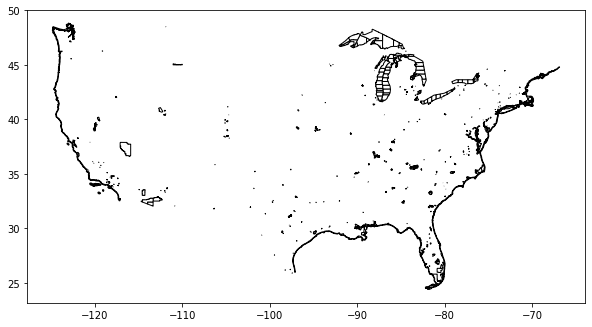

In [41]:
# check data values - many invalid values
delta = 0.00001
print(np.sum(us_tract_travel_health_mainland_shp.median_age < delta))
print(np.sum(us_tract_travel_health_mainland_shp['pop'] < delta))
print(np.sum(us_tract_travel_health_mainland_shp.households < delta))

age_filter = us_tract_travel_health_mainland_shp.median_age < delta
pop_filter = us_tract_travel_health_mainland_shp['pop'] < delta
households_filter = us_tract_travel_health_mainland_shp.households < delta
joint_filter = np.logical_or(np.logical_or(age_filter, pop_filter), households_filter)

us_tract_zeros_shp = us_tract_travel_health_mainland_shp.loc[joint_filter, :]
us_tract_zeros_shp.plot(facecolor='w', edgecolor='k', figsize = (10,10))
# sw: rivers, lakes also have census tract ids. Remove them!

In [42]:
# filter - Choosing the non_zero columns. 
us_tract_travel_health_mainland_shp = us_tract_travel_health_mainland_shp.loc[~joint_filter, :]

In [43]:
us_tract_travel_health_mainland_shp.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,hh_worker_2_more,pct_worker_2_more,geoid,binge,bphigh,chd,diabetes,obesity,lpa,total_pop_cdc
0,38,047,972500,38047972500,9725,Census Tract 9725,G5020,S,2571326104,47715596,...,347,39.52,38047972500,17.6,39.8,10.1,13.0,36.3,27.9,1990
1,38,073,969000,38073969000,9690,Census Tract 9690,G5020,S,1442387838,1962257,...,299,50.08,38073969000,22.0,34.4,6.8,10.1,36.2,23.1,1511
2,38,009,952400,38009952400,9524,Census Tract 9524,G5020,S,2255183406,53013501,...,365,33.42,38009952400,20.6,38.0,8.5,12.1,34.7,24.2,2279
3,38,009,952500,38009952500,9525,Census Tract 9525,G5020,S,2055808274,21851497,...,273,31.63,38009952500,21.7,36.1,7.8,11.0,34.3,24.4,1861
4,38,009,952300,38009952300,9523,Census Tract 9523,G5020,S,10204813,0,...,407,37.27,38009952300,20.4,36.3,8.8,11.4,32.2,26.0,2289


In [44]:
print(us_tract_travel_health_mainland_shp.shape)
np.sum(us_tract_travel_health_mainland_shp.isna(), axis = 0)

(71567, 67)


STATEFP           0
COUNTYFP          0
TRACTCE           0
GEOID             0
NAME              0
                 ..
chd              48
diabetes         48
obesity          48
lpa              48
total_pop_cdc    48
Length: 67, dtype: int64

## Create a discrete census tract adjacency network
sw: wait. I need to use us_tract_travel_health_mainland_shp...

In [45]:
from pysal.lib import weights

In [46]:
# it takes 3 min. 
us_tract_mainland_net = weights.contiguity.Queen.from_dataframe(us_tract_mainland_shp)

/usr/local/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 2 islands with ids: 3122, 65985.
  warnings.warn(message)


In [47]:
us_tract_mainland_net.n

72359

In [48]:
# how to save a networkx object
import pickle

with open('../../data/processed_data/us_tract_adjacency_net.pickle', 'wb') as f:
    pickle.dump(us_tract_mainland_net, f)

## Clean the two flow files

1. flow_20_march_week4_mainland - turn it to a shapefile to allow visualization. 
2. flow_16_acs_mainland_shp - clean the very long trips. Seem wrong.


In [49]:
flow_16_acs_mainland_shp.head()

,Ofips,Dfips,Ostfips,Octfips,Otrfips,Dstfips,Dctfips,Dtrfips,Flow,Moe,LenKM,ESTDIVMOE,geometry
0,06073018700,06073018700,6,73,18700,6,73,18700,20950,2359,0.0,8.88,"LINESTRING (-1962571.816 1365494.964, -1962571..."
1,51710000902,51710000902,51,710,902,51,710,902,10155,2516,0.0,4.04,"LINESTRING (1725102.003 1722267.521, 1725102.0..."
2,45079011501,45079011501,45,79,11501,45,79,11501,8735,875,0.0,9.98,"LINESTRING (1374784.181 1326371.876, 1374784.1..."
3,13215010802,13215010802,13,215,10802,13,215,10802,7720,1144,0.0,6.75,"LINESTRING (1043619.702 1106797.886, 1043619.7..."
4,06071010402,06071010402,6,71,10402,6,71,10402,7040,848,0.0,8.30,"LINESTRING (-1822105.260 1460201.368, -1822105..."


(array([3.911195e+06, 9.489400e+04, 2.481800e+04, 1.391800e+04,
        8.918000e+03, 5.726000e+03, 4.573000e+03, 3.702000e+03,
        3.069000e+03, 2.521000e+03, 2.569000e+03, 2.250000e+03,
        1.977000e+03, 1.946000e+03, 1.596000e+03, 1.751000e+03,
        1.640000e+03, 1.718000e+03, 1.635000e+03, 1.417000e+03,
        1.151000e+03, 9.880000e+02, 8.530000e+02, 5.950000e+02,
        6.110000e+02, 5.720000e+02, 6.130000e+02, 5.600000e+02,
        5.180000e+02, 4.480000e+02, 3.900000e+02, 5.170000e+02,
        3.290000e+02, 3.630000e+02, 3.340000e+02, 3.560000e+02,
        2.560000e+02, 2.700000e+02, 3.220000e+02, 2.660000e+02,
        2.560000e+02, 2.700000e+02, 3.400000e+02, 3.500000e+02,
        4.640000e+02, 2.150000e+02, 2.670000e+02, 1.040000e+02,
        8.000000e+01, 2.600000e+01]),
 array([      0.        ,   88152.86371461,  176305.72742922,
         264458.59114383,  352611.45485843,  440764.31857304,
         528917.18228765,  617070.04600226,  705222.90971687,
        

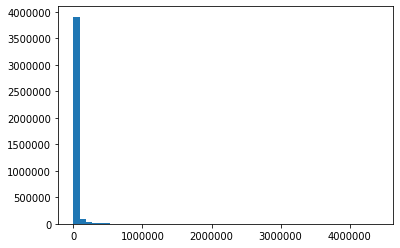

In [50]:
# sw: units of the length seem to be meters. e.g. The Euclidean distance of Boston to LA is 4171.42 km.
plt.hist(flow_16_acs_mainland_shp.length, bins = 50)

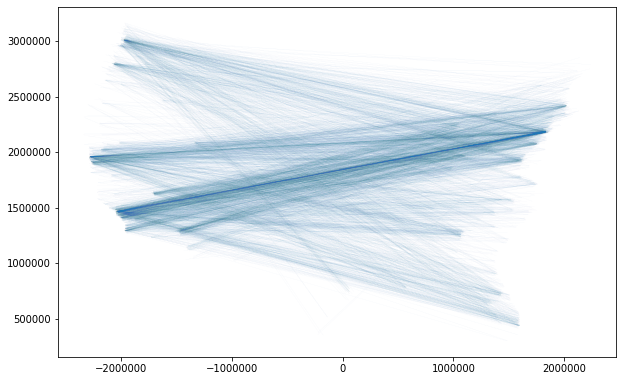

In [39]:
# very long trips (> 3000 km)
flow_16_acs_mainland_shp.loc[flow_16_acs_mainland_shp.length > 3000000, :].plot(linewidth = 0.01, figsize=(10,10))

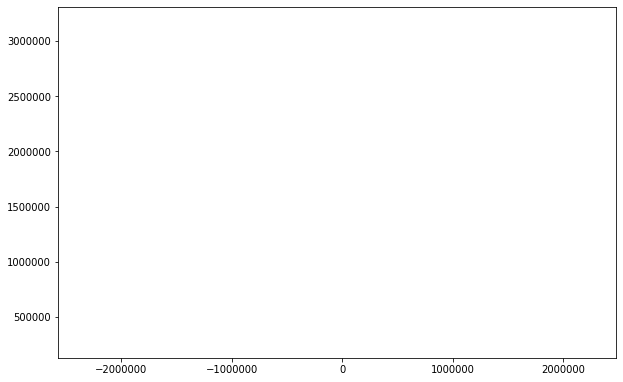

In [40]:
# very short trips (legnth = 0.0)
flow_16_acs_mainland_shp.loc[flow_16_acs_mainland_shp.length < 0.1, :].plot(linewidth = 0.01, figsize=(10,10))

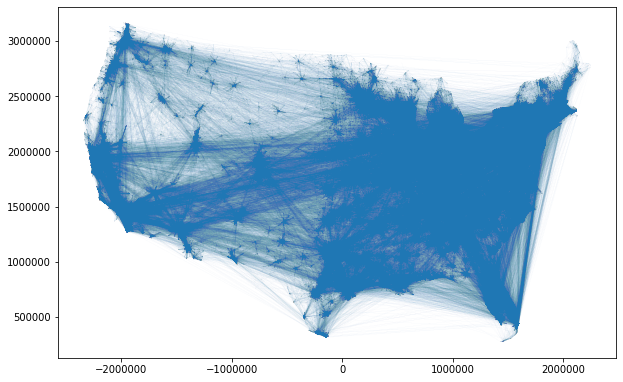

In [41]:
# non-zero trips
# it takes about 5min to visualize
flow_16_acs_mainland_shp.loc[flow_16_acs_mainland_shp.length > 0.1, :].plot(linewidth = 0.01, figsize=(10,10))

In [51]:
flow_16_acs_mainland_shp.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [52]:
flow_20_march_week4_mainland.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows
0,48215024108,48215023902,-98.39318,26.281112,-98.189715,26.271691,03/23/20 - 03/29/20,7,179.0
1,48215024108,48215020503,-98.39318,26.281112,-98.266601,26.159350,03/23/20 - 03/29/20,12,307.0
2,48215024108,48215021803,-98.39318,26.281112,-98.146706,26.200975,03/23/20 - 03/29/20,4,102.0
3,48215024108,48215021903,-98.39318,26.281112,-98.107774,26.184998,03/23/20 - 03/29/20,14,359.0
4,48215024108,42037051400,-98.39318,26.281112,-76.298024,41.011175,03/23/20 - 03/29/20,4,102.0


In [53]:
o_points = [xy for xy in zip(flow_20_march_week4_mainland.lng_o, flow_20_march_week4_mainland.lat_o)]
d_points = [xy for xy in zip(flow_20_march_week4_mainland.lng_d, flow_20_march_week4_mainland.lat_d)]

In [54]:
line_list = [LineString([o_point,d_point]) for o_point,d_point in zip(o_points,d_points)]

In [55]:
# create geopandas df.
# it takes ?min 
flow_20_march_week4_mainland_shp = gpd.GeoDataFrame(flow_20_march_week4_mainland,
                                                   geometry=line_list,
                                                   crs='EPSG:4326') # EPSG seems the default lon-lat crs

In [56]:
flow_20_march_week4_mainland_shp = flow_20_march_week4_mainland_shp.to_crs('EPSG:5070') # same as the mainland US. 

(array([4.070064e+06, 2.603800e+05, 1.114580e+05, 7.398000e+04,
        5.266000e+04, 4.088100e+04, 3.367700e+04, 2.888300e+04,
        2.507700e+04, 2.227800e+04, 2.111800e+04, 1.840500e+04,
        1.572300e+04, 1.379000e+04, 1.330600e+04, 1.340400e+04,
        1.252400e+04, 1.185100e+04, 1.099700e+04, 9.330000e+03,
        8.015000e+03, 7.008000e+03, 6.082000e+03, 4.743000e+03,
        4.331000e+03, 4.410000e+03, 3.961000e+03, 3.383000e+03,
        3.069000e+03, 2.574000e+03, 2.482000e+03, 2.707000e+03,
        2.167000e+03, 2.035000e+03, 1.927000e+03, 1.770000e+03,
        1.302000e+03, 1.458000e+03, 1.413000e+03, 1.181000e+03,
        1.087000e+03, 1.115000e+03, 1.018000e+03, 1.006000e+03,
        7.340000e+02, 5.720000e+02, 3.870000e+02, 1.030000e+02,
        1.290000e+02, 4.100000e+01]),
 array([      0.        ,   88996.89275208,  177993.78550416,
         266990.67825623,  355987.57100831,  444984.46376039,
         533981.35651247,  622978.24926455,  711975.14201663,
        

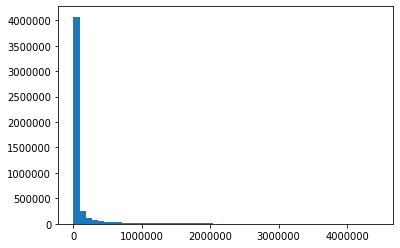

In [57]:
plt.hist(flow_20_march_week4_mainland_shp.length, bins = 50)

In [58]:
flow_20_march_week4_mainland_shp.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows,geometry
0,48215024108,48215023902,-98.39318,26.281112,-98.189715,26.271691,03/23/20 - 03/29/20,7,179.0,"LINESTRING (-240979.899 361643.891, -220519.78..."
1,48215024108,48215020503,-98.39318,26.281112,-98.266601,26.159350,03/23/20 - 03/29/20,12,307.0,"LINESTRING (-240979.899 361643.891, -228555.61..."
2,48215024108,48215021803,-98.39318,26.281112,-98.146706,26.200975,03/23/20 - 03/29/20,4,102.0,"LINESTRING (-240979.899 361643.891, -216364.75..."
3,48215024108,48215021903,-98.39318,26.281112,-98.107774,26.184998,03/23/20 - 03/29/20,14,359.0,"LINESTRING (-240979.899 361643.891, -212480.39..."
4,48215024108,42037051400,-98.39318,26.281112,-76.298024,41.011175,03/23/20 - 03/29/20,4,102.0,"LINESTRING (-240979.899 361643.891, 1632001.83..."


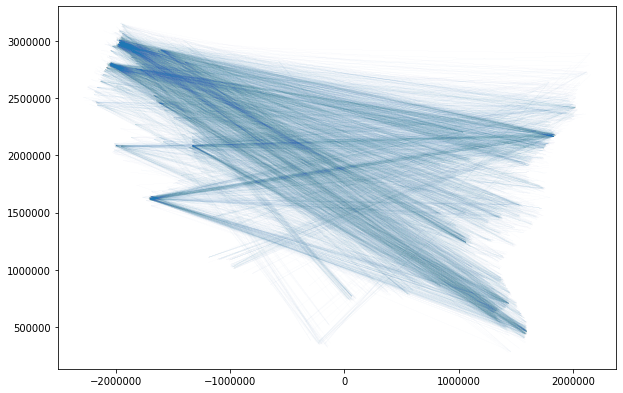

In [92]:
# very long trips.
flow_20_march_week4_mainland_shp.loc[flow_20_march_week4_mainland_shp.length > 3000000, :].plot(linewidth = 0.01, figsize=(10,10))

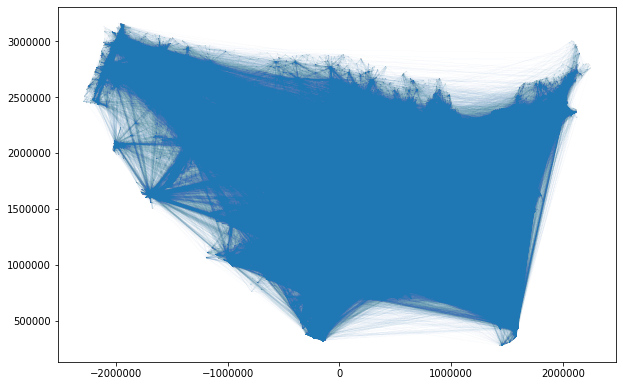

In [93]:
# non-zero trips.
# it takes ? min.
flow_20_march_week4_mainland_shp.loc[flow_20_march_week4_mainland_shp.length > 0.1, :].plot(linewidth = 0.01, figsize=(10,10))


## Create MA and Chicago subsets

In [61]:
# too slow to work with the USA data file. I will work on two subsets: MA and Chicago. 
# MA: 25
# Cook county: 17031

In [62]:
us_tract_travel_health_mainland_shp.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,hh_worker_2_more,pct_worker_2_more,geoid,binge,bphigh,chd,diabetes,obesity,lpa,total_pop_cdc
0,38,047,972500,38047972500,9725,Census Tract 9725,G5020,S,2571326104,47715596,...,347,39.52,38047972500,17.6,39.8,10.1,13.0,36.3,27.9,1990
1,38,073,969000,38073969000,9690,Census Tract 9690,G5020,S,1442387838,1962257,...,299,50.08,38073969000,22.0,34.4,6.8,10.1,36.2,23.1,1511
2,38,009,952400,38009952400,9524,Census Tract 9524,G5020,S,2255183406,53013501,...,365,33.42,38009952400,20.6,38.0,8.5,12.1,34.7,24.2,2279
3,38,009,952500,38009952500,9525,Census Tract 9525,G5020,S,2055808274,21851497,...,273,31.63,38009952500,21.7,36.1,7.8,11.0,34.3,24.4,1861
4,38,009,952300,38009952300,9523,Census Tract 9523,G5020,S,10204813,0,...,407,37.27,38009952300,20.4,36.3,8.8,11.4,32.2,26.0,2289


In [72]:
# MA and Chicago
us_tract_travel_health_MA_shp = us_tract_travel_health_mainland_shp.loc[us_tract_travel_health_mainland_shp.STATEFP == '25', :]
us_tract_travel_health_Cook_shp = us_tract_travel_health_mainland_shp.loc[np.logical_and(us_tract_travel_health_mainland_shp.STATEFP == '17', us_tract_travel_health_mainland_shp.COUNTYFP == '031'), :]


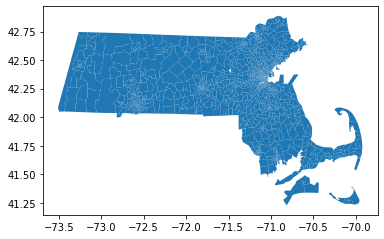

In [73]:
us_tract_travel_health_MA_shp.plot()

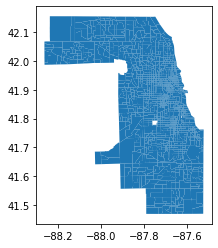

In [74]:
us_tract_travel_health_Cook_shp.plot()

In [80]:
# Cook county and MA
print(us_tract_travel_health_MA_shp.shape)
print(us_tract_travel_health_Cook_shp.shape)

(1459, 67)
(1315, 67)


In [78]:
# subsets for MA and Cook
flow_20_march_week4_MA_shp=flow_20_march_week4_mainland_shp.loc[np.logical_and(flow_20_march_week4_mainland_shp.geoid_o.isin(us_tract_travel_health_MA_shp.geoid), 
                                                                               flow_20_march_week4_mainland_shp.geoid_d.isin(us_tract_travel_health_MA_shp.geoid)),:]
flow_20_march_week4_Cook_shp=flow_20_march_week4_mainland_shp.loc[np.logical_and(flow_20_march_week4_mainland_shp.geoid_o.isin(us_tract_travel_health_Cook_shp.geoid), 
                                                                               flow_20_march_week4_mainland_shp.geoid_d.isin(us_tract_travel_health_Cook_shp.geoid)),:]
flow_16_acs_MA_shp=flow_16_acs_mainland_shp.loc[np.logical_and(flow_16_acs_mainland_shp.Ofips.isin(us_tract_travel_health_MA_shp.geoid), 
                                                                               flow_16_acs_mainland_shp.Dfips.isin(us_tract_travel_health_MA_shp.geoid)),:]
flow_16_acs_Cook_shp=flow_16_acs_mainland_shp.loc[np.logical_and(flow_16_acs_mainland_shp.Ofips.isin(us_tract_travel_health_Cook_shp.geoid), 
                                                                               flow_16_acs_mainland_shp.Dfips.isin(us_tract_travel_health_Cook_shp.geoid)),:]

print(flow_20_march_week4_MA_shp.shape)
print(flow_20_march_week4_Cook_shp.shape)
print(flow_16_acs_MA_shp.shape)
print(flow_16_acs_Cook_shp.shape)
print(flow_16_acs_mainland_shp.shape)
print(flow_20_march_week4_mainland_shp.shape)

(63848, 10)
(77900, 10)
(101633, 13)
(80204, 13)
(4104517, 13)
(4931996, 10)


## Save files (USA, MA, and Cook)

In [59]:
# 
flow_20_march_week4_mainland_shp.to_file('../../data/processed_data/flow_20_march_week4_mainland_shp.geojson', driver = 'GeoJSON')

In [60]:
# 
flow_16_acs_mainland_shp.to_file('../../data/processed_data/flow_16_acs_mainland_shp.geojson', driver = 'GeoJSON')

In [31]:
# ESRI shapefiles cannot have names longer than ten characters.
# us_tract_travel_health_mainland_shp.to_file('../../data/processed_data/us_tract_mainland_shp.shp')
# geojson.
us_tract_travel_health_mainland_shp.to_file('../../data/processed_data/us_tract_mainland_shp.geojson', driver = 'GeoJSON')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


In [81]:
# MA and Cook maps
us_tract_travel_health_MA_shp.to_file('../../data/processed_data/us_tract_MA_shp.geojson', driver='GeoJSON')
us_tract_travel_health_Cook_shp.to_file('../../data/processed_data/us_tract_Cook_shp.geojson', driver='GeoJSON')

In [82]:
# MA and Cook flows
flow_20_march_week4_MA_shp.to_file('../../data/processed_data/flow_20_march_week4_MA_shp.geojson', driver = 'GeoJSON')
flow_20_march_week4_Cook_shp.to_file('../../data/processed_data/flow_20_march_week4_Cook_shp.geojson', driver = 'GeoJSON')
flow_16_acs_MA_shp.to_file('../../data/processed_data/flow_16_acs_MA_shp.geojson', driver = 'GeoJSON')
flow_16_acs_Cook_shp.to_file('../../data/processed_data/flow_16_acs_Cook_shp.geojson', driver = 'GeoJSON')
